In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import dexplot as dxp

# ## Reading Data

In [2]:
BankData = pd.read_csv('bank-full.csv',encoding='cp1252', sep=';')

# ## Exploring Data

In [3]:
BankData.head(20)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Dimensions of our data

In [6]:
BankData.shape

(45211, 17)

Features names

In [7]:
BankData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
print(type(BankData.campaign[0]))
print(type(BankData.previous[0]))
print(type(BankData.pdays[0]))
print(type(BankData.poutcome[0]))
print(type(BankData.job[0]))
print(type(BankData.marital[0]))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>


Data features:

   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric)
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
  
   
  
   related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
   
   
   Other attributes:
   
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

As we can see that we have three different types of data: Numeric (age,balance,day,duration,campaign,pdays,previous), Binary (default,housing,loan), and Catogerical(Job, marital, education,contact,month,poutcome). In addition, for the catogerical ones, we have nominal and ordinal(with some sense of order) data!

In [9]:
BankData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
BankData['y'].describe()

count     45211
unique        2
top          no
freq      39922
Name: y, dtype: object

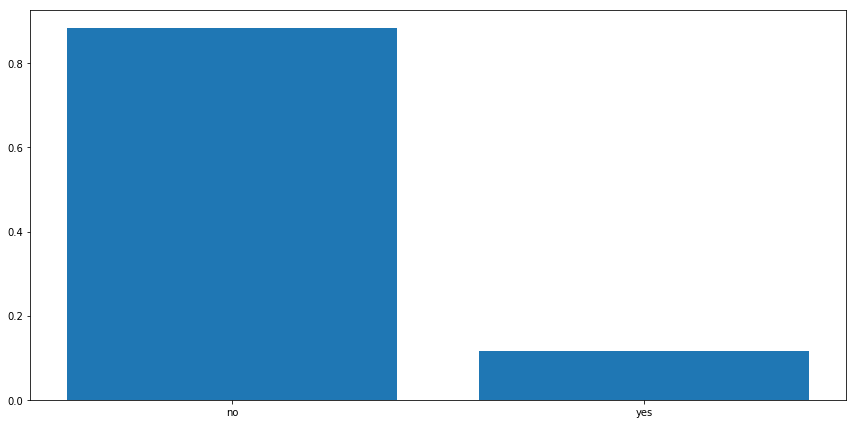

In [11]:
dxp.aggplot(agg='y', data=BankData, normalize='all')

It looks like we have much more unsubscribers "no" than subscribers "yes" which gives us some sense of imbalanced data!


In [12]:
BankData.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Good news is that we have no missing data here!

In [14]:
BankData['y_num']= BankData['y'].map({'no':0,'yes':1})
BankData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,0


Let's explor the connections of the target varible with the predictors!

# 1- Continuous Data Analysis

In [15]:
BankData_cont = BankData[['age','balance','duration','campaign','pdays','previous']]

In [16]:
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
BnkDta_scaled=min_max.fit_transform(BankData_cont)


In [17]:
names = BankData_cont.columns
BnkDtaContNorm= pd.DataFrame(BnkDta_scaled, columns=names)
BnkDtaContNorm['y']=BankData['y']

In [18]:
BnkDtaContNorm.head()

,age,balance,duration,campaign,pdays,previous,y
0,0.519481,0.092259,0.053070,0.0,0.0,0.0,no
1,0.337662,0.073067,0.030704,0.0,0.0,0.0,no
2,0.194805,0.072822,0.015453,0.0,0.0,0.0,no
3,0.376623,0.086476,0.018707,0.0,0.0,0.0,no
4,0.194805,0.072812,0.040260,0.0,0.0,0.0,no


# Client's age 

In [19]:
#print("The clients' ages vary between {} and {}, and an average of {}".format(BankData.age.max(),BankData.age.min(),BankData.age.mean()))
BankData.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

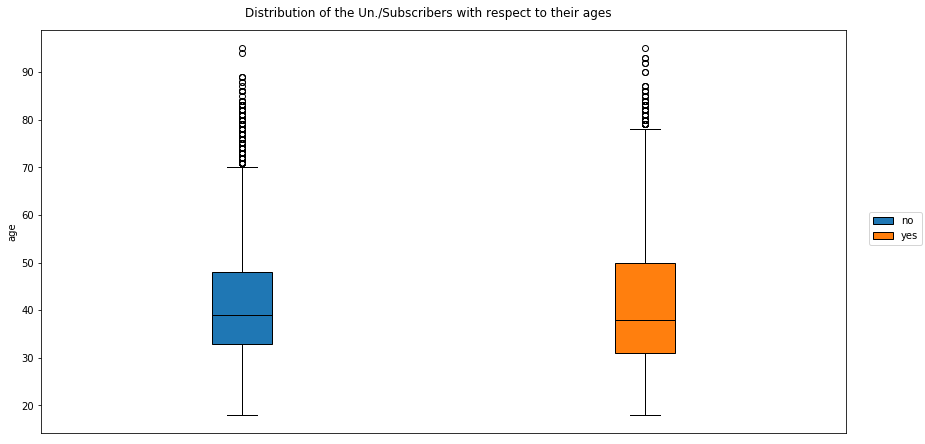

In [20]:
dxp.aggplot('age', data=BankData, hue='y',kind='box',normalize='age', title="Distribution of the Un./Subscribers with respect to their ages")

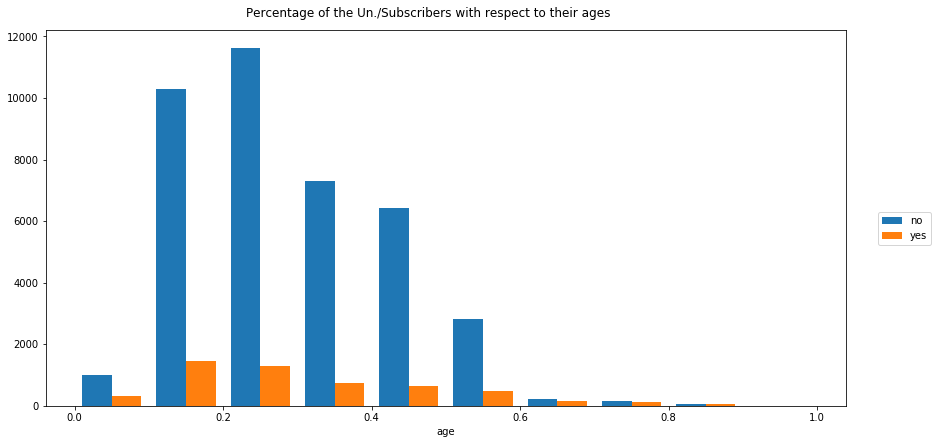

In [21]:
dxp.aggplot('age', data=BnkDtaContNorm, hue='y',kind='hist',title="Percentage of the Un./Subscribers with respect to their ages")

In [22]:
#fig = BankData.age.hist(figsize=(12,6),by=BankData.y,bins=20)
#fig.set_title('Clients age distribution')
#fig.set_xlabel('age of the client')

It looks that we have most of the clients falls in the (30-40years) range. Let's check it!

In [23]:
IQR = BankData.age.quantile(0.75) - BankData.age.quantile(0.25)

Lower_fence = BankData.age.quantile(0.25) - (IQR * 1.5)
Upper_fence = BankData.age.quantile(0.75) + (IQR * 1.5)

print("We can identify the outliers with the range of data defined by the upper fence {} and the lower fence {}; however, we need to limit the lower fence to the min value of {}".format(Upper_fence, Lower_fence,BankData.age.min()))

We can identify the outliers with the range of data defined by the upper fence 70.5 and the lower fence 10.5; however, we need to limit the lower fence to the min value of 18


In [24]:
BankData.age.quantile(0.75) + (IQR * 1.5)

70.5

In [25]:
print(BankData.age.quantile(0.75) + (IQR * 1.5))
print(BankData.age.quantile(0.75) + (IQR * 3))

70.5
93.0


In [26]:
total_clients = np.float(BankData.shape[0])

print('Total clients: {} which represents {} as a percentage'.format(BankData.shape[0], BankData.shape[0] / total_clients))

print('Clients that older than 71: {}(%{})'.format(BankData[BankData.age > 71].shape[0],BankData[BankData.age > 71].shape[0] / total_clients))

print('Clients that older than 93: {}(%{})'.format(BankData[BankData.age > 93].shape[0],BankData[BankData.age > 93].shape[0] / total_clients))

Total clients: 45211 which represents 1.0 as a percentage
Clients that older than 71: 433(%0.009577315255137024)
Clients that older than 93: 3(%6.63555329455221e-05)


In [27]:
BankData[(BankData['age']>70)].head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
29158,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,unknown,no,0
29261,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,no,0
29263,75,retired,married,primary,no,3324,no,no,cellular,2,feb,149,1,-1,0,unknown,no,0
29322,83,retired,married,tertiary,no,6236,no,no,cellular,2,feb,283,2,-1,0,unknown,no,0
29865,75,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,-1,0,unknown,yes,1
30225,72,retired,married,primary,no,9160,no,no,cellular,5,feb,229,1,-1,0,unknown,no,0
30264,71,retired,married,tertiary,no,2651,no,no,cellular,5,feb,531,2,-1,0,unknown,no,0
30908,76,retired,married,primary,no,2590,no,no,telephone,9,feb,68,12,-1,0,unknown,no,0
31051,83,retired,single,primary,no,3349,no,no,telephone,12,feb,89,1,-1,0,unknown,no,0
31052,71,retired,married,unknown,no,362,no,no,telephone,12,feb,139,2,-1,0,unknown,no,0


In [28]:
BankData[BankData.age > 90].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
31233,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,212,1,-1,0,unknown,no,0
33699,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,yes,1
41663,95,retired,married,secondary,no,0,no,no,telephone,1,oct,215,1,-1,0,unknown,no,0
41934,92,retired,married,unknown,no,775,no,no,cellular,22,oct,313,3,-1,0,unknown,yes,1
42727,92,retired,married,unknown,no,775,no,no,cellular,26,jan,164,4,96,3,success,yes,1


## How can we deal with the outliers in this case??

# Client's average yearly balance

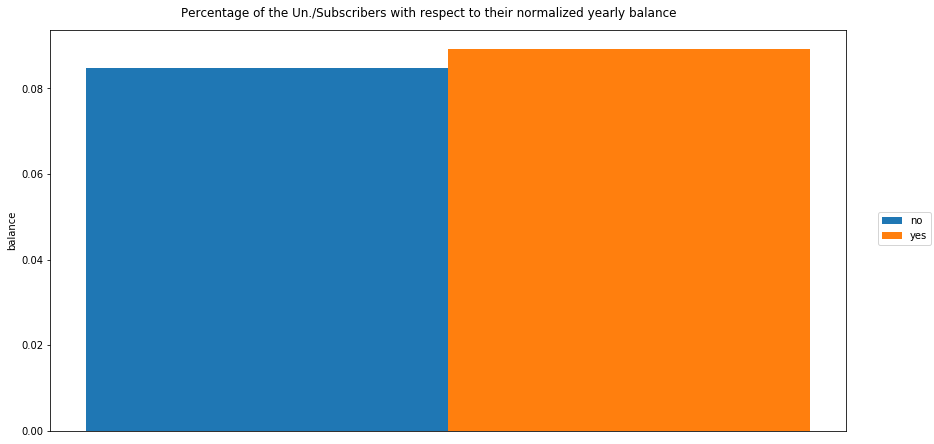

In [29]:
dxp.aggplot('balance', data=BnkDtaContNorm,hue='y',title="Percentage of the Un./Subscribers with respect to their normalized yearly balance")

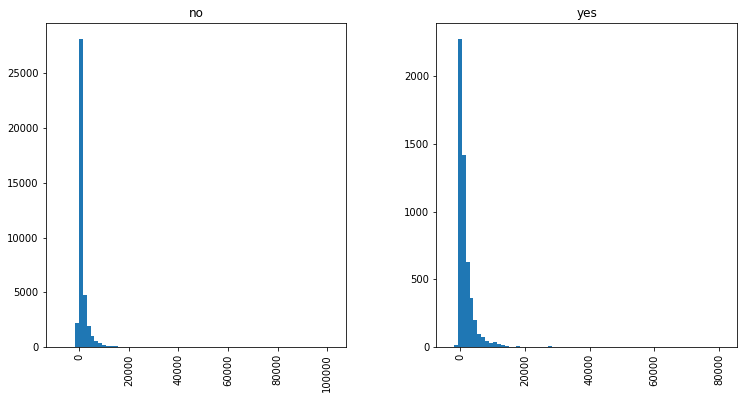

In [30]:
fig = BankData.balance.hist(figsize=(12,6), by=BankData['y'],bins=70)

In [31]:
BankData.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [32]:
IQR_blanc = BankData.balance.quantile(0.75) - BankData.balance.quantile(0.25)

Lower_fence_blanc = BankData.balance.quantile(0.25) - (IQR_blanc * 1.5)
Upper_fence_blanc = BankData.balance.quantile(0.75) + (IQR_blanc * 1.5)

print("It looks like we have the outliers of the balance variable within the range of (the upper fence: {}) and (the lower fence: {})".format(Upper_fence_blanc, Lower_fence_blanc))

It looks like we have the outliers of the balance variable within the range of (the upper fence: 3462.0) and (the lower fence: -1962.0)


# Last Call's Duration (in secs)

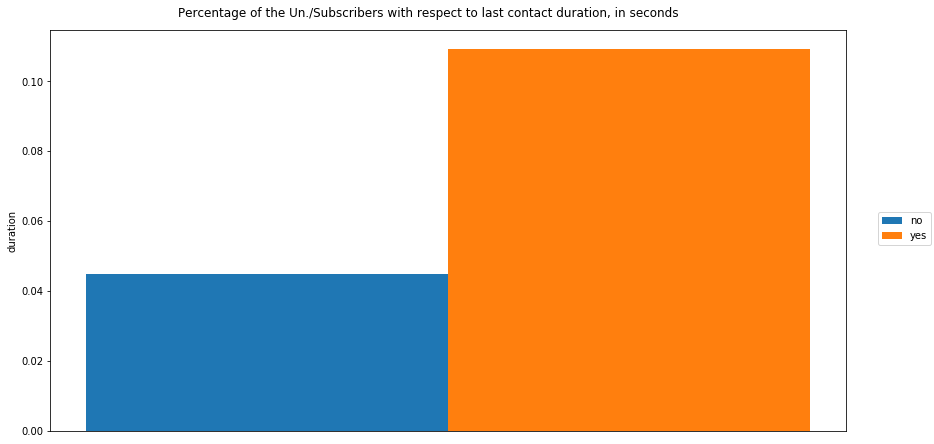

In [33]:
dxp.aggplot('duration', data=BnkDtaContNorm, hue='y',title="Percentage of the Un./Subscribers with respect to last contact duration, in seconds")

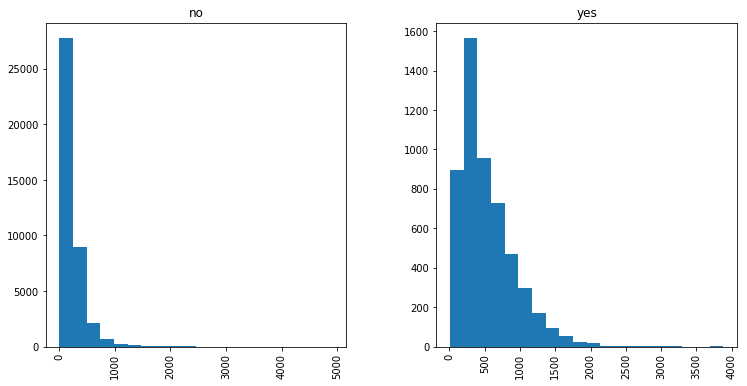

In [34]:
fig= BankData.duration.hist(by=BankData.y,figsize=(12,6), bins=20)

In [35]:
BankData.duration.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

From the previous skewed distribution, we can conclude that potential subsucribers are probably willing to have much more longer chat time with the bank agent than of the unsubscribers!

In [36]:
IQR_Duration = BankData.duration.quantile(0.75) - BankData.duration.quantile(0.25)

Lower_fence_d = BankData.duration.quantile(0.25) - (IQR_Duration * 1.5)
Upper_fence_d = BankData.duration.quantile(0.75) + (IQR_Duration * 1.5)

print("It looks like we have the outliers of the duration variable within the range of (the upper fence: {}) and (the lower fence: {} which doesn't make sense with the negative sign so we can limit it to zero)".format(Upper_fence_d, Lower_fence_d))

It looks like we have the outliers of the duration variable within the range of (the upper fence: 643.0) and (the lower fence: -221.0 which doesn't make sense with the negative sign so we can limit it to zero)


# Number of calls in the current campaign

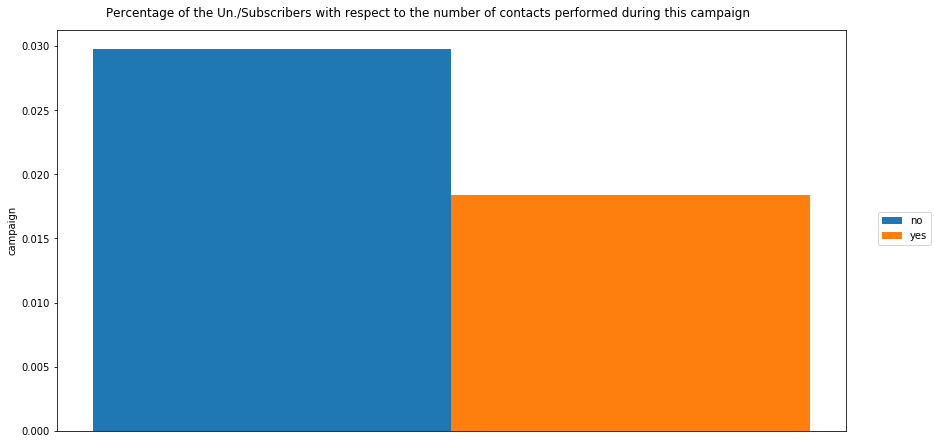

In [37]:
dxp.aggplot('campaign', data=BnkDtaContNorm, hue='y',title="Percentage of the Un./Subscribers with respect to the number of contacts performed during this campaign")

The last plot shows the distribution of the variable "campaign" which shows the number of calls carried out for the client in the current campaign. It looks like we have much more fails than succussful trials "calls" for marketing the bank product! 

In [38]:
BankData.campaign.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [39]:
BankData[BankData['y']=='yes'].head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,1
270,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes,1
388,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes,1
390,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes,1
446,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,yes,1
457,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes,1


In [40]:
BankData[BankData['y']=='no'].head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,0


Since we have max of 63 calls during this campaign that is much higher than the average number of calls, let's check it!

In [41]:
IQR_campaign = BankData.campaign.quantile(0.75) - BankData.campaign.quantile(0.25)

Lower_fence_camp = BankData.campaign.quantile(0.25) - (IQR_campaign * 3)
Upper_fence_camp = BankData.campaign.quantile(0.75) + (IQR_campaign * 3)

print("It looks like we have the outliers of the campaign variable within the range of (the upper fence: {}) and (the lower fence: {} which doesn't make sense with the negative sign so we can limit it to 1)".format(Upper_fence_camp, Lower_fence_camp))

It looks like we have the outliers of the campaign variable within the range of (the upper fence: 9.0) and (the lower fence: -5.0 which doesn't make sense with the negative sign so we can limit it to 1)


In [42]:
# knowing that the month of 'may' has much more clients who unsubscribe than the subscribers. 
# So I excluded May to take off its impact on the results
BankData[(BankData.campaign > 9) & (BankData.month != 'may')].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
8039,32,services,married,secondary,no,109,yes,no,unknown,2,jun,364,13,-1,0,unknown,no,0
8044,32,technician,married,secondary,no,0,no,no,unknown,2,jun,68,21,-1,0,unknown,no,0
8152,52,management,married,secondary,no,218,yes,no,unknown,2,jun,490,12,-1,0,unknown,no,0
8170,34,management,married,tertiary,no,986,yes,no,unknown,2,jun,105,11,-1,0,unknown,no,0
8238,38,admin.,married,primary,no,0,yes,no,unknown,2,jun,29,32,-1,0,unknown,no,0


The previous dataset shows that with a larger number of contacts (calls), we have a higher probability to have the client as unsubscriber for the bank product! 

# Number of calls vs. Duration of the last call with the same client

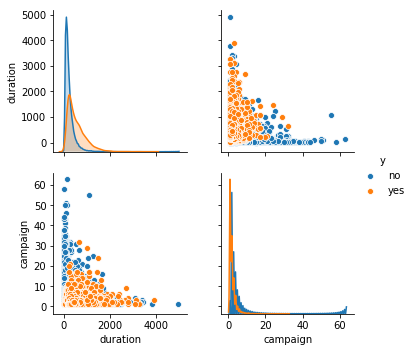

In [43]:
ContDataPart1=BankData[['duration','campaign','y']]
sns.pairplot(ContDataPart1,hue='y')

It looks that we have inverse variation between the number of calls "contacts" with a client vs. the duration of the last call with same client!Clients who subscribed tend to have less number of calls with a longer duration for the last call comparing with the un-subscribers. It does make sense if we think about it in the way that the subscribers did not need many calls to convince them while they had to spend some time during a call to set the agreement. The same idea works in the opposite direction for the unsubscribers that the bank agent needed to have more contacts with those clients!  

# Period of days since the last call of the previous campaign

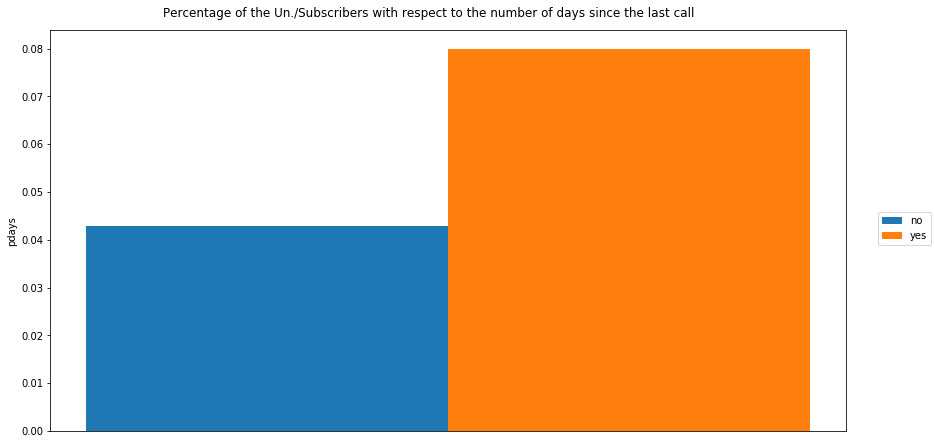

In [44]:
dxp.aggplot('pdays', data=BnkDtaContNorm, hue='y',title="Percentage of the Un./Subscribers with respect to the number of days since the last call")

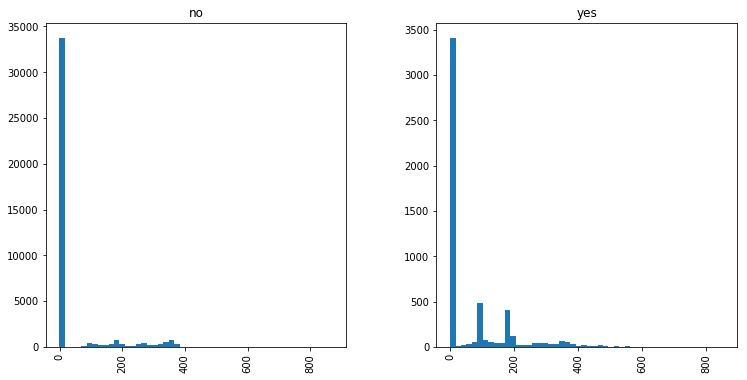

In [45]:
fig= BankData.pdays.hist(by=BankData.y,figsize=(12,6), bins=50)

In [46]:
BankData.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [47]:
BankData[BankData.pdays > 400].head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
40506,38,unemployed,married,primary,no,7005,yes,no,cellular,7,jul,370,1,412,1,failure,yes,1
40590,42,management,single,tertiary,no,11008,no,no,cellular,28,jul,822,6,405,1,success,yes,1
40591,34,technician,married,secondary,no,603,yes,no,cellular,28,jul,51,4,434,1,failure,no,0
40711,57,services,married,secondary,no,2476,yes,no,cellular,7,aug,239,1,459,1,success,no,0
40751,33,management,married,tertiary,no,22867,yes,no,cellular,10,aug,73,1,440,2,failure,no,0
40811,31,management,married,tertiary,no,199,yes,yes,cellular,11,aug,127,2,461,4,success,no,0
40829,40,admin.,single,secondary,no,100,yes,no,cellular,11,aug,221,1,461,1,success,yes,1
40835,58,self-employed,married,primary,no,1013,yes,no,cellular,11,aug,206,1,461,1,failure,yes,1
40841,32,blue-collar,single,tertiary,no,60,yes,yes,cellular,11,aug,248,2,462,1,failure,no,0
40862,32,technician,married,secondary,no,484,yes,no,cellular,12,aug,668,2,463,1,success,yes,1


# The number of previous contacts before this campaign

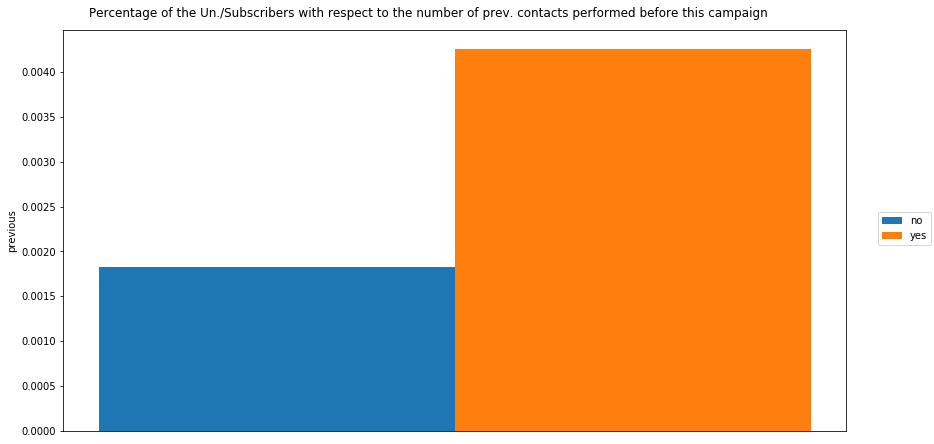

In [48]:
dxp.aggplot('previous', data=BnkDtaContNorm, hue='y',title="Percentage of the Un./Subscribers with respect to the number of prev. contacts performed before this campaign")

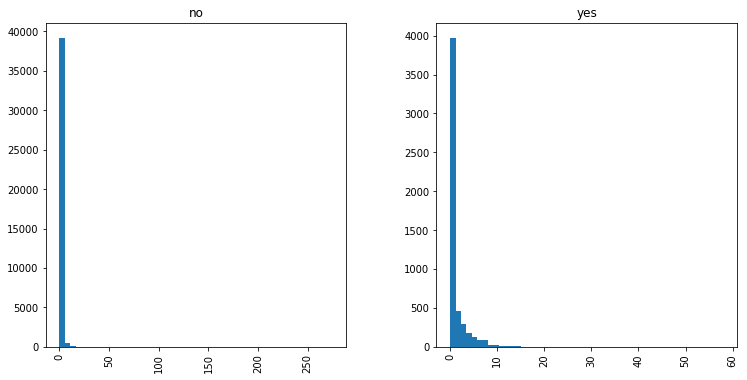

In [49]:
fig= BankData.previous.hist(by=BankData.y,figsize=(12,6), bins=50)

In [50]:
BankData.previous.describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [51]:
IQR_prev = BankData.previous.quantile(0.75) - BankData.previous.quantile(0.25)

Lower_fence_prev = BankData.previous.quantile(0.25) - (IQR_prev * 1.5)
Upper_fence_prev = BankData.previous.quantile(0.75) + (IQR_prev * 1.5)

print("It looks like we have the outliers of the 'previous' variable within the range of (the upper fence: {}) and (the lower fence: {})".format(Upper_fence_prev, Lower_fence_prev)) 

It looks like we have the outliers of the 'previous' variable within the range of (the upper fence: 0.0) and (the lower fence: 0.0)


In [52]:
BankData[BankData.previous > 2].head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no,0
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes,1
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no,0
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes,1
24122,26,technician,single,tertiary,no,172,no,yes,telephone,4,nov,21,1,140,4,other,no,0
24136,34,management,married,tertiary,no,1770,yes,no,unknown,6,nov,26,1,101,11,other,no,0
24160,34,admin.,married,tertiary,no,899,yes,no,unknown,12,nov,114,1,170,3,failure,yes,1
24165,30,admin.,married,secondary,no,873,yes,no,telephone,12,nov,119,1,167,3,success,no,0
24230,47,blue-collar,married,secondary,no,1484,no,no,cellular,17,nov,297,1,119,3,failure,no,0
24295,35,technician,divorced,tertiary,no,1718,yes,yes,cellular,17,nov,74,1,167,16,other,no,0


# Number of calls in this campaign vs. in previous campaign

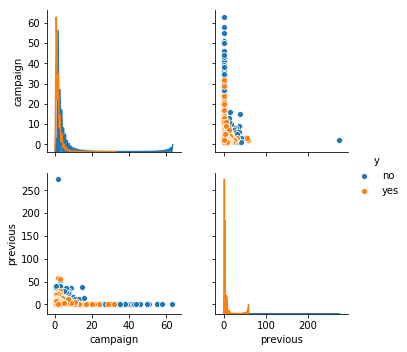

In [53]:
ContDataPart2=BankData[['campaign','previous','y']]
sns.pairplot(ContDataPart2,hue='y')

From the plot, we can conclude that for both un/subscribers, we have more calls/contacts during this campaign comparing with in the previous one! However, we still have a larger number of calls which have been carried out for unsubscribers!  

## Let's compare the fratures related to the last call in this campaign

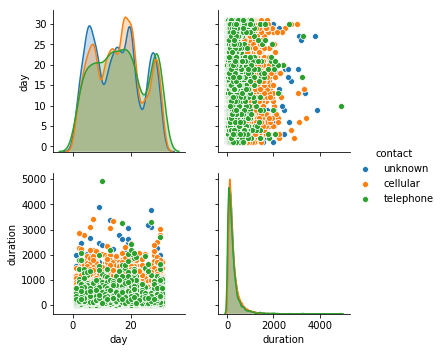

In [54]:
ContDataPart3=BankData[['day','duration','contact']]
sns.pairplot(ContDataPart3,hue='contact')

Looking to the day variable, we can tell that it looks like we have some relaxing days for the clients (at each third of the month) where we have longer chat time regardless of the way of communication. However, if we take a deep look at the contact method, we can say that we have longer calls with cellular than with the telephone. That mekes sense since the cellular is more flixable in terms of its mobility!

# 2- Categorical Data Analysis

In [55]:
BankData_catog= BankData[['job', 'marital', 'education','contact', 'poutcome']]

In [56]:
BankData_catog.head(10)

,job,marital,education,contact,poutcome
0,management,married,tertiary,unknown,unknown
1,technician,single,secondary,unknown,unknown
2,entrepreneur,married,secondary,unknown,unknown
3,blue-collar,married,unknown,unknown,unknown
4,unknown,single,unknown,unknown,unknown
5,management,married,tertiary,unknown,unknown
6,management,single,tertiary,unknown,unknown
7,entrepreneur,divorced,tertiary,unknown,unknown
8,retired,married,primary,unknown,unknown
9,technician,single,secondary,unknown,unknown


# Job

In [57]:
BankData.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

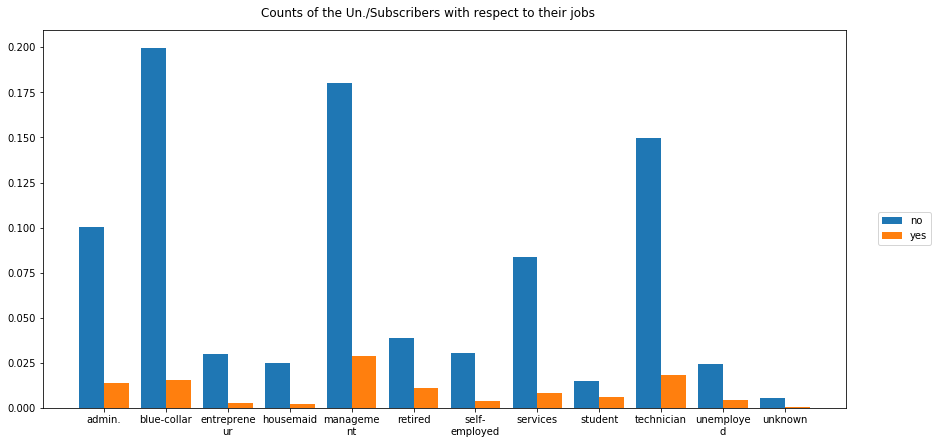

In [58]:
dxp.aggplot('job', data=BankData, hue='y', normalize='all',ylabel="Percentage of Clients",title="Counts of the Un./Subscribers with respect to their jobs")

# Marital Status

In [59]:
BankData.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

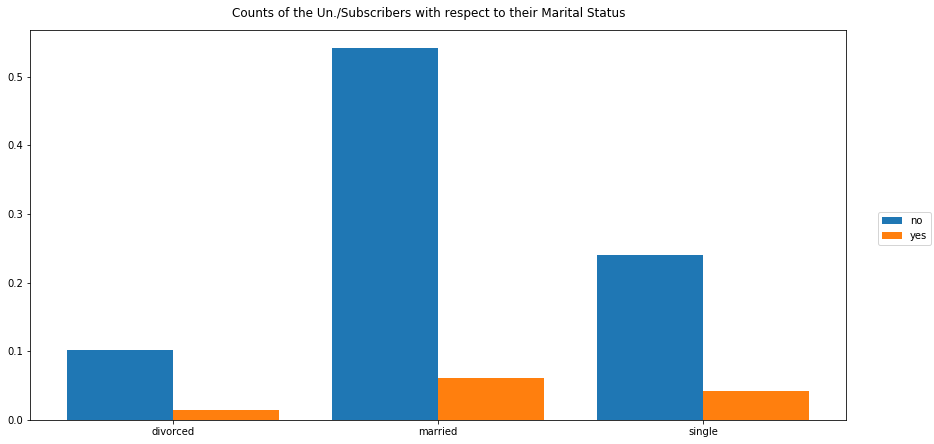

In [60]:
dxp.aggplot('marital', data=BankData, hue='y', normalize='all',ylabel="Percentage of Clients",title="Counts of the Un./Subscribers with respect to their Marital Status")

# Last Month of Contact

In [61]:
BankData.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

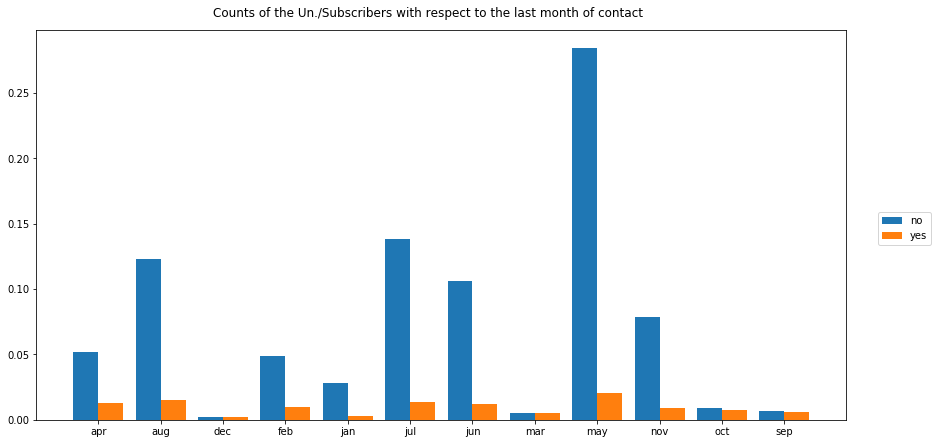

In [62]:
dxp.aggplot(agg='month', data=BankData, hue='y',normalize='all', ylabel="Percentage of Clients",title="Counts of the Un./Subscribers with respect to the last month of contact")

In [63]:
#f, ax = plt.subplots(figsize=(16, 8))
#fig=sns.countplot(x='month', data= BankData, hue='y')

# Education Level

In [64]:
BankData.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

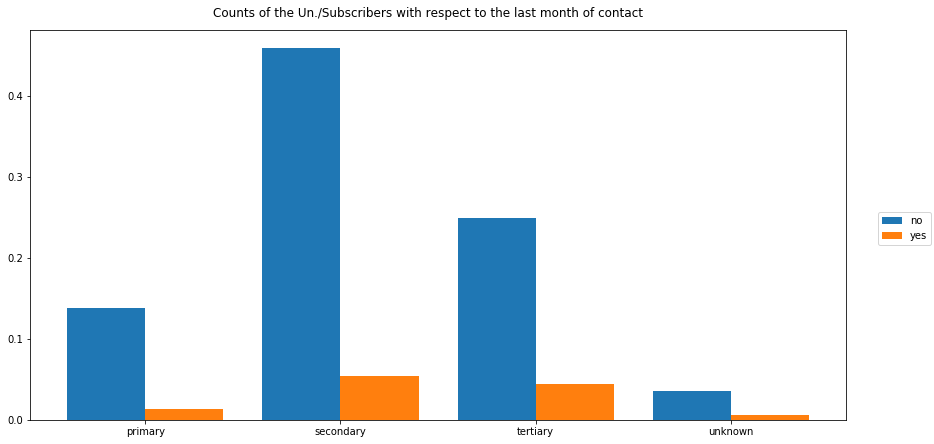

In [65]:
dxp.aggplot(agg='education', data=BankData, hue='y',normalize='all', ylabel="Percentage of Clients",title="Counts of the Un./Subscribers with respect to the last month of contact")

# Communication Method

In [66]:
BankData.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

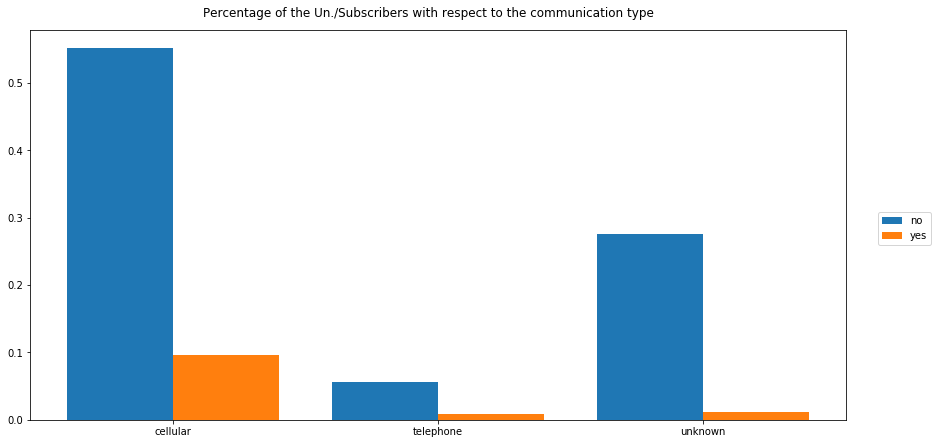

In [67]:
dxp.aggplot(agg='contact', data=BankData, hue='y',normalize='all',title="Percentage of the Un./Subscribers with respect to the communication type")

# Outcome of the previous marketing campaign

In [68]:
BankData.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

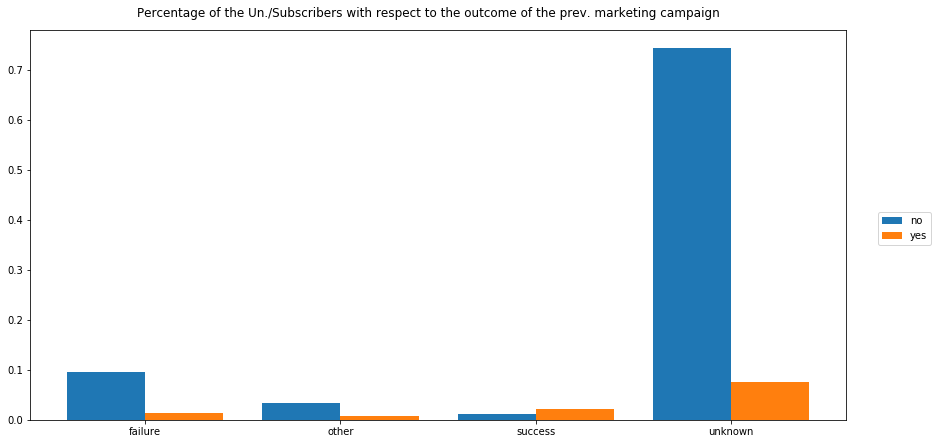

In [69]:
dxp.aggplot(agg='poutcome', data=BankData, hue='y',normalize='all',title="Percentage of the Un./Subscribers with respect to the outcome of the prev. marketing campaign")

# Day position in the month: Which third of the month?


In [70]:
bins = [0,10, 20, 31]
names = ['1', '2', '3']

BankData['day_interval'] = pd.cut(BankData['day'], bins, labels=names)


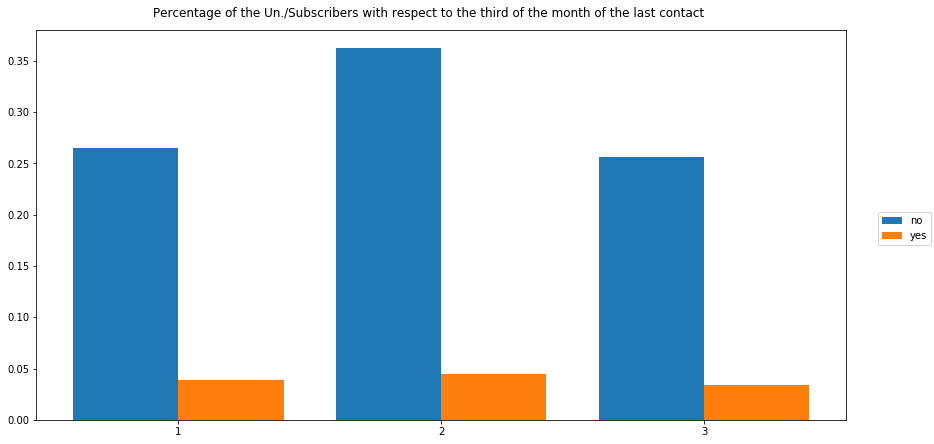

In [71]:
dxp.aggplot(agg='day_interval', data=BankData, hue='y',normalize='all',title="Percentage of the Un./Subscribers with respect to the third of the month of the last contact")

# Let's check the balance of the catogeroies of the data among the training and testing sets!


In [72]:
X_train, X_test, y_train, y_test = train_test_split(BankData_catog,BankData.y_num,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((31647, 5), (13564, 5))

In [73]:
## Let's find out labels that may present only in the training set
unique_to_train_set = [x for x in X_train.job.unique() if x not in X_test.job.unique()]
len(unique_to_train_set)

0

In [74]:
unique_to_train_set = [x for x in X_train.marital.unique() if x not in X_test.marital.unique()]
len(unique_to_train_set)

0

# Encoding catogerical data into dummy variables

In [75]:
BankData_catog.columns

Index(['job', 'marital', 'education', 'contact', 'poutcome'], dtype='object')

In [76]:
##pd.get_dummies(BankData_catog[['job','marital','education','contact','poutcome']])
BankData_catog = pd.get_dummies(BankData_catog)
BankData_catog.head()


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


We may need to deal with the "Month" variable differently as we need to preserve the sense of order among the year months!

In [77]:
BankData['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [78]:
# We may need to reserve the order of the months as following
BankData_catog['month']= BankData['month'].map({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})
# For the binary variables 
BankData_catog['default']= BankData['default'].map({'yes':1, 'no':0})
BankData_catog['housing']= BankData['housing'].map({'yes':1, 'no':0})
BankData_catog['loan']= BankData['loan'].map({'yes':1, 'no':0})

# Mapping the day of the month into "Interval" variable!

Since we do not have the year info, there is no point to concatenate the day and month features. Instead, I decided to deal with the day based on its position in the month (i.e. Which third does this day located in)  

In [79]:

BankData_catog['day_interval'] = BankData.day_interval


In [80]:
BankData_catog.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month,default,housing,loan,day_interval
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,5,0,1,0,1
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,5,0,1,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,5,0,1,1,1
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,5,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,5,0,0,0,1


In [81]:
BankData_catog.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'month', 'default', 'housing',
       'loan', 'day_interval'],
      dtype='object')

# Normalizing the numeric data

In [84]:
BankData_cont.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [85]:
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
BnkDta_scaled=min_max.fit_transform(BankData_cont)


In [86]:
names = BankData_cont.columns
BnkDtaContNorm= pd.DataFrame(BnkDta_scaled, columns=names)
BnkDtaContNorm.head()

,age,balance,duration,campaign,pdays,previous
0,0.519481,0.092259,0.053070,0.0,0.0,0.0
1,0.337662,0.073067,0.030704,0.0,0.0,0.0
2,0.194805,0.072822,0.015453,0.0,0.0,0.0
3,0.376623,0.086476,0.018707,0.0,0.0,0.0
4,0.194805,0.072812,0.040260,0.0,0.0,0.0


In [87]:
#from sklearn import preprocessing
# Get column names first
#names = BankData_cont.columns

# Create the Scaler object
#scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
#scaled_df = scaler.fit_transform(BankData_cont)
#scaled_df = pd.DataFrame(scaled_df, columns=names)
#scaled_df.head()

In [88]:
BankData_final= pd.concat([BankData_catog,BnkDtaContNorm], axis=1)
BankData_final['y']=BankData.y_num
BankData_final.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing,loan,day_interval,age,balance,duration,campaign,pdays,previous,y
0,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0.519481,0.092259,0.053070,0.0,0.0,0.0,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0.337662,0.073067,0.030704,0.0,0.0,0.0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,1,1,0.194805,0.072822,0.015453,0.0,0.0,0.0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0.376623,0.086476,0.018707,0.0,0.0,0.0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.194805,0.072812,0.040260,0.0,0.0,0.0,0


In [89]:
BankData_final.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'month', 'default', 'housing',
       'loan', 'day_interval', 'age', 'balance', 'duration', 'campaign',
       'pdays', 'previous', 'y'],
      dtype='object')

In [90]:
BankData_final.shape

(45211, 38)

In [91]:
BankData_final.isnull().sum()

job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_cellular       0
contact_telephone      0
contact_unknown        0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
month                  0
default                0
housing                0
loan                   0
day_interval           0
age                    0
balance                0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
dtype: int64

In [92]:
BankData_final.to_csv(path_or_buf='C:/Users/KBrig/BankMarketing/BankMarketing/BankDataFinal.csv',index=False)